In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
np.set_printoptions(precision=3, suppress=True)
import warnings
warnings.filterwarnings('ignore')

In [9]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin']

raw_dataset = pd.read_csv(url, names=column_names,
                          na_values='?', comment='\t',
                          sep=' ', skipinitialspace=True)

In [10]:
df = raw_dataset.copy()
df.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for i in df.columns :
    df[i] = le.fit_transform(df[i])

In [12]:
df.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,17,4,69,60,247,13,0,0
1,7,4,72,78,265,11,0,0
2,17,4,70,72,241,6,0,0
3,9,4,67,72,240,13,0,0
4,13,4,66,67,244,5,0,0


In [13]:
df.isnull().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      0
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

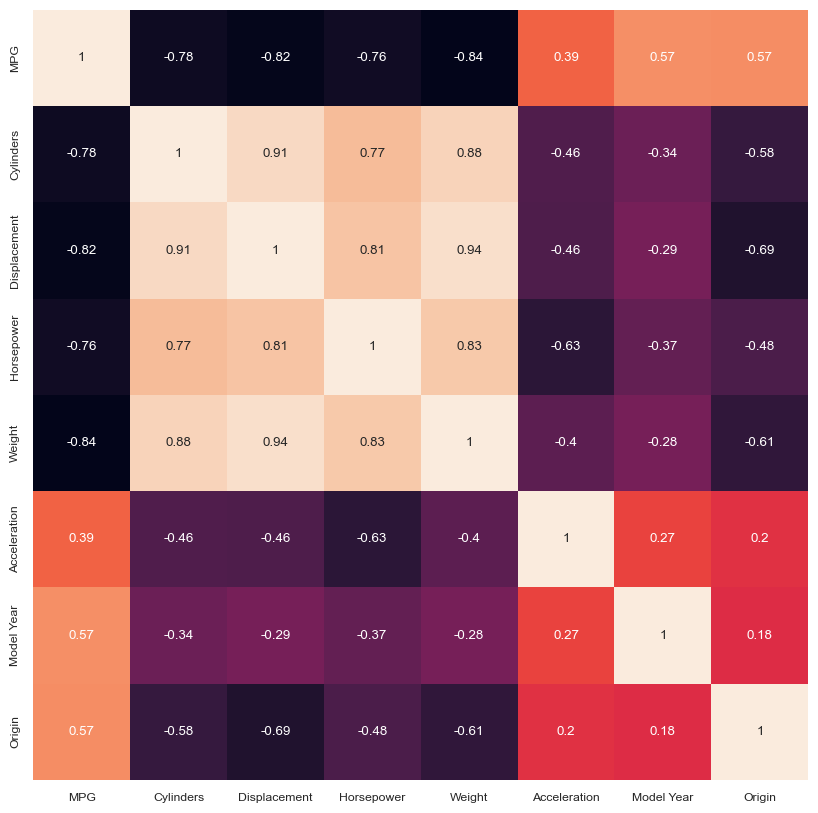

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
#상관 관계 행렬
df_corr=df.corr()

#히트맵
plt.figure(figsize=(10,10))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=False)
plt.show()

In [15]:
X = df.drop('Origin', axis=1)
y = df['Origin']
Y = pd.get_dummies(y).values

In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(64, activation = 'relu', input_shape = (7,)))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(1)) 
model.compile(optimizer = 'rmsprop', loss = 'mse', metrics = ['mse'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                512       
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2,625
Trainable params: 2,625
Non-trainable params: 0
_________________________________________________________________


In [20]:
N_EPOCHS = 100
history = model.fit(X_train, y_train, epochs = N_EPOCHS, validation_data=(X_test, y_test))

Epoch 1/100
10/10 [==============================] - 0s 8ms/step - loss: 77.1960 - mse: 77.1960 - val_loss: 8.2944 - val_mse: 8.2944
Epoch 2/100
10/10 [==============================] - 0s 1ms/step - loss: 8.4380 - mse: 8.4380 - val_loss: 4.2429 - val_mse: 4.2429
Epoch 3/100
10/10 [==============================] - 0s 1ms/step - loss: 15.5755 - mse: 15.5755 - val_loss: 5.7004 - val_mse: 5.7004
Epoch 4/100
10/10 [==============================] - 0s 1ms/step - loss: 9.4363 - mse: 9.4363 - val_loss: 18.8935 - val_mse: 18.8935
Epoch 5/100
10/10 [==============================] - 0s 1ms/step - loss: 7.9929 - mse: 7.9929 - val_loss: 2.5889 - val_mse: 2.5889
Epoch 6/100
10/10 [==============================] - 0s 1ms/step - loss: 11.3806 - mse: 11.3806 - val_loss: 1.4880 - val_mse: 1.4880
Epoch 7/100
10/10 [==============================] - 0s 1ms/step - loss: 2.6313 - mse: 2.6313 - val_loss: 27.4611 - val_mse: 27.4611
Epoch 8/100
10/10 [==============================] - 0s 1ms/step - loss: 

Epoch 63/100
10/10 [==============================] - 0s 1ms/step - loss: 4.3036 - mse: 4.3036 - val_loss: 2.8434 - val_mse: 2.8434
Epoch 64/100
10/10 [==============================] - 0s 1ms/step - loss: 0.7144 - mse: 0.7144 - val_loss: 0.9772 - val_mse: 0.9772
Epoch 65/100
10/10 [==============================] - 0s 1ms/step - loss: 4.0734 - mse: 4.0734 - val_loss: 1.1188 - val_mse: 1.1188
Epoch 66/100
10/10 [==============================] - 0s 1ms/step - loss: 3.4314 - mse: 3.4314 - val_loss: 2.1892 - val_mse: 2.1892
Epoch 67/100
10/10 [==============================] - 0s 1ms/step - loss: 1.6144 - mse: 1.6144 - val_loss: 11.8529 - val_mse: 11.8529
Epoch 68/100
10/10 [==============================] - 0s 1ms/step - loss: 4.3416 - mse: 4.3416 - val_loss: 0.8544 - val_mse: 0.8544
Epoch 69/100
10/10 [==============================] - 0s 1ms/step - loss: 2.8388 - mse: 2.8388 - val_loss: 3.6694 - val_mse: 3.6694
Epoch 70/100
10/10 [==============================] - 0s 1ms/step - loss: 

In [21]:
test_mse_score, test_mae_score = model.evaluate(X_test, y_test)

3/3 [==============================] - 0s 1ms/step - loss: 6.1935 - mse: 6.1935


In [22]:
test_mse_score

6.193515300750732

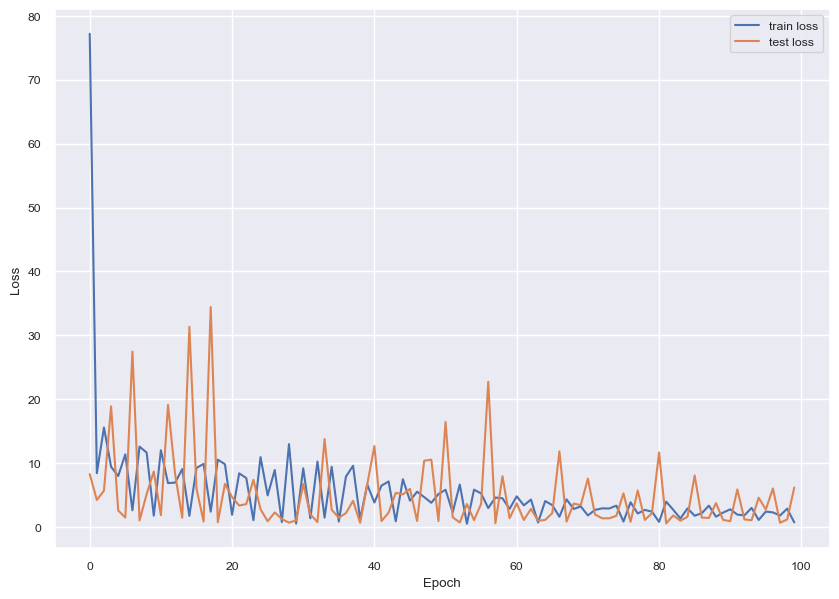

In [23]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.plot(range(N_EPOCHS), history.history['loss'], label='train loss')
plt.plot(range(N_EPOCHS), history.history['val_loss'], label='test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

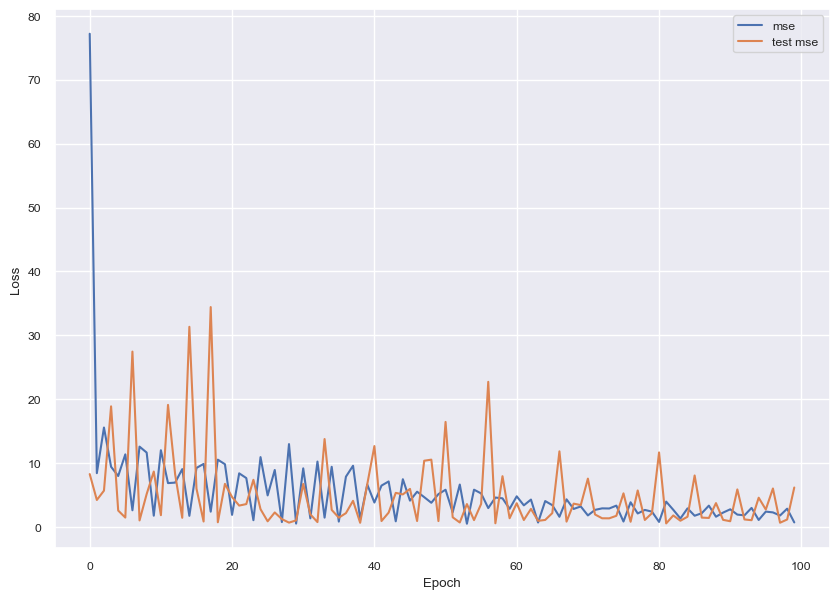

In [24]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.plot(range(N_EPOCHS), history.history['mse'], label='mse')
plt.plot(range(N_EPOCHS), history.history['val_mse'], label='test mse')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()